# Context Persistence Demo

This notebook demonstrates how context persists across kernel restarts and how to manage it.

## Part 1: Initial Session

Let's start a conversation and build some context:

In [ ]:
# Enable chat mode
%llm_chat on

💬 Chat mode: ON
📓 Notebook context mode: ON
📝 Just type in any cell to chat!
💡 Your notebook cells are now the LLM's context window!


In [ ]:
Hi! I'm working on a Python project. My name is Bob and I'm building a web scraper.

[LLM Kernel] INFO: 
LiteLLM completion() model= gpt-4o-mini; provider = openai
[LLM Kernel] INFO: HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
[LLM Kernel] INFO: Wrapper: Completed Call, calling success_handler


[gpt-4o-mini]
----------------------------------------
Hi Bob! That sounds like an interesting project. What kind of website are you planning to scrape, and what data are you looking to collect?


In [ ]:
# Define some project-specific code
import requests
from bs4 import BeautifulSoup

def scrape_website(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup.title.string if soup.title else "No title found"

# Test it
test_url = "https://example.com"
print(f"Title: {scrape_website(test_url)}")

Title: Example Domain


In [ ]:
Can you help me improve this scraper to handle errors better?

## Part 2: Context Management

Let's save our context before restarting:

In [ ]:
# Save the current context
%llm_context_save my_scraper_session.json

In [ ]:
# Check what's in our context
%llm_context

## Part 3: Simulating a Restart

Now imagine you've restarted the kernel or come back tomorrow...

In [ ]:
# Reset context to simulate a fresh start
%llm_context_reset

In [12]:
# Check - context should be empty
%llm_context

📓 Notebook Context - Showing cells that will be sent to LLM:
📔 Notebook file not found - using execution history
✨ Auto-rescanned (1 new cells detected)

[1] USER:
exec(open('test_multimodal_display.py').read())
test_image_display()
----------------------------------------

[2] USER:
exec(open('test_multimodal_display.py').read())
test_image_display()
----------------------------------------

[3] USER:
exec(open('test_multimodal_display.py').read())
test_image_display()
----------------------------------------

[4] USER:
exec(open('test_multimodal_display.py').read())
test_image_display()
----------------------------------------

[5] USER:
exec(open('test_multimodal_display.py').read())
test_image_display()
----------------------------------------

[6] USER:
exec(open('test_multimodal_display.py').read())
test_image_display()
----------------------------------------

[7] USER:
exec(open('test_multimodal_display.py').read())
test_image_display()
----------------------------------------


In [ ]:
# Now load our saved context
%llm_context_load my_scraper_session.json

In [ ]:
# The LLM should remember our previous conversation!
Do you remember my name and what project I'm working on?

## Part 4: Context Persistence Settings

By default, the kernel loads all notebook cells automatically:

In [ ]:
# Check persistence status
%llm_context_persist status

In [ ]:
# You can disable automatic loading
%llm_context_persist off

In [ ]:
# Or enable it again (default)
%llm_context_persist on

## Part 5: Working with Hidden Context

Some cells might contain sensitive info:

In [ ]:
%%hide
# This won't be saved in context
API_KEY = "super-secret-key-12345"
DATABASE_PASSWORD = "definitely-not-password123"

In [ ]:
# Save context again - hidden cells won't be included
%llm_context_save scraper_with_secrets.json

In [ ]:
# Reset but keep hidden cells
%llm_context_reset --keep-hidden

## Summary

Context persistence features:

1. **Automatic Loading** - By default, all notebook cells are loaded as context
2. **Save/Load** - Explicitly save and restore context sessions
3. **Reset** - Clear context while optionally keeping hidden cells
4. **Persistence Control** - Toggle automatic loading on/off

This allows you to:
- Continue conversations across kernel restarts
- Share context between notebooks
- Manage different conversation sessions
- Keep sensitive data hidden while preserving context

In [ ]:
# Disable chat mode
%llm_chat off

📋 Clipboard contains an image:


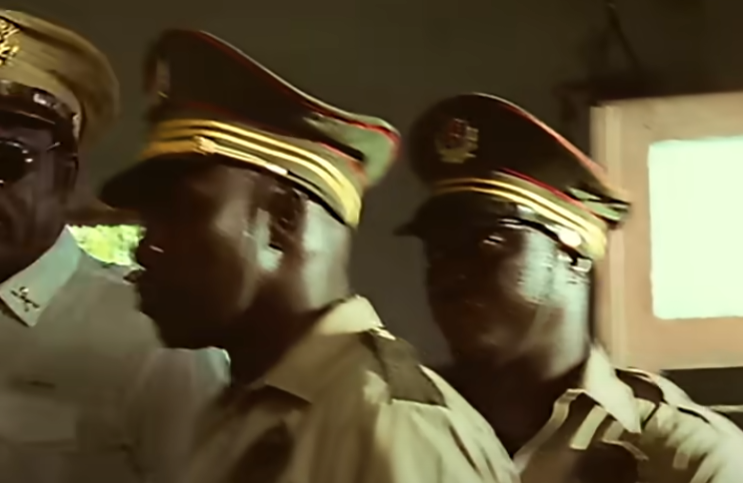

In [8]:
 %llm_paste --show 

In [14]:
%llm_model gpt-4o


✅ Switched to gpt-4o


In [3]:
%llm_chat

💬 Chat mode: ON
📝 Just type in any cell to chat!
💡 Your notebook cells are now the LLM's context window!
🔄 Context auto-rescans when you add cells


In [ ]:
%llm_paste


✅ Pasted PDF 'the_alignment_trap.pdf' (0.52 MB) - added to conversation context
💡 You can now ask questions about this PDF in any cell


In [4]:
%%llm
What's in the pdf

In [16]:
%llm_context

📓 Notebook Context - Showing cells that will be sent to LLM:
📔 Notebook file not found - using execution history
✨ Auto-rescanned (1 new cells detected)

[1] USER:
exec(open('test_multimodal_display.py').read())
test_image_display()
----------------------------------------

[2] USER:
exec(open('test_multimodal_display.py').read())
test_image_display()
----------------------------------------

[3] USER:
exec(open('test_multimodal_display.py').read())
test_image_display()
----------------------------------------

[4] USER:
exec(open('test_multimodal_display.py').read())
test_image_display()
----------------------------------------

[5] USER:
exec(open('test_multimodal_display.py').read())
test_image_display()
----------------------------------------

[6] USER:
exec(open('test_multimodal_display.py').read())
test_image_display()
----------------------------------------

[7] USER:
exec(open('test_multimodal_display.py').read())
test_image_display()
----------------------------------------


In [1]:
%llm_pdf_native

❌ Please provide a PDF path
